Import library yang akan digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA

upload file dataset yang akan digunakan

contoh data dataDiabetes.xlsx

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataDiabetes.xlsx to dataDiabetes (2).xlsx


membaca file yang di upload dan ditampilkan dalam bentuk tabel

yaitu file dataDiabetes.xlsx

In [ ]:
import io
dataframe = pd.read_excel(io.BytesIO(uploaded['dataDiabetes.xlsx']))
X = dataframe.iloc[:,0:8]
dataframe

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2288.000,33,tested_positive
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive


hasil tabel menampilkan 8 atribut 

preprocessing, center dan scaled dataframe yang telah dibuat

In [ ]:
scaled_dataframe = preprocessing.StandardScaler().fit_transform(X)

pca.fit(scaled_dataframe) berfungsi untuk melakukan operasi matematika PCA, seperti menghitung loading scores dan variasi yang dihitung oleh masing-masing principal component.

pca.transform(scaled_dataframe) berfungsi untuk membuat koordinat grafik PCA berdasarkan loading score dan data yang telah di scaled

In [ ]:
pca = PCA()
pca.fit(scaled_dataframe)
pca_dataframe = pca.transform(scaled_dataframe)

mencetak variance dari masing-masing principal components ke dalam scree plot

[25.56 21.46 12.92 11.67  9.5   8.54  5.29  5.05]


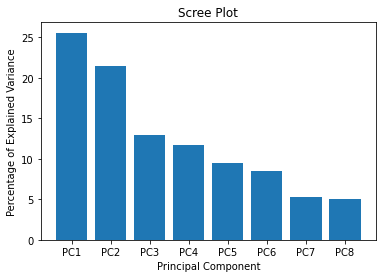

In [ ]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=2)
print(per_var)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

data scree plot menampilkan 8 PC yang memiliki nilai variance berbeda. 

Untuk mendapatkan setidaknya 90% variance membutuhkan PC1 sampai PC7 yang berjumlah 94,94%

terdapat 1 PC yang dapat direduksi yaitu PC8. jika di reduksi lebih banyak dari 1 maka data akan semakin tidak akurat 

hasil loading score dari masing masing principal components

In [ ]:
for i in range(0,8):
    loading_scores = pd.Series(pca.components_[i], index = ["preg", "plas", "pres", "skin", "insu", "mass", "pedi", "age"])
    sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
    print("PC" + str(i+1))
    print(sorted_loading_scores)
    print("\n")

PC1
mass    0.451722
insu    0.419072
skin    0.418541
plas    0.412645
pres    0.391284
age     0.243447
pedi    0.178353
preg    0.175197
dtype: float64


PC2
age     0.606140
preg    0.582077
skin    0.380493
insu    0.295023
mass    0.152913
plas    0.136223
pres    0.135976
pedi    0.039224
dtype: float64


PC3
pedi    0.590701
plas    0.462821
pres    0.417641
mass    0.332971
insu    0.299811
skin    0.235484
preg    0.077286
age     0.016225
dtype: float64


PC4
pedi    0.769299
insu    0.394417
pres    0.343305
plas    0.336858
mass    0.121260
preg    0.064435
age     0.049173
skin    0.002961
dtype: float64


PC5
plas    0.518854
skin    0.480073
preg    0.468122
pres    0.312630
insu    0.281831
mass    0.263508
pedi    0.143286
age     0.118528
dtype: float64


PC6
mass    0.677235
pres    0.635332
insu    0.304076
preg    0.190247
plas    0.065914
pedi    0.064197
age     0.022559
skin    0.008639
dtype: float64


PC7
age     0.714587
preg    0.592557
skin    0.274748
pre

IndexError: ignored